In [202]:
import numpy as np
from math import sin, cos, pi
from random import randint, uniform
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [203]:
t = np.arange(0, 2*pi, 0.025)
a = [0.4, 0.7, 1]
b = [0.15, 0.5, 1]
alpha = [pi/6,-pi/3,0]
x = lambda t,n: a[n]*cos(t)*cos(alpha[n]) - b[n]*sin(t)*sin(alpha[n])
y = lambda t,n: a[n]*cos(t)*sin(alpha[n]) + b[n]*sin(t)*cos(alpha[n])

## Первый этап

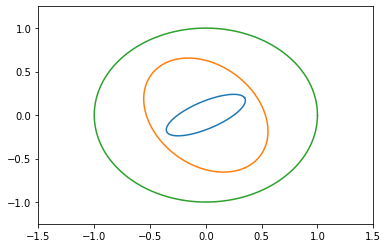

In [204]:
plt.xlim(-1.5, 1.5)
plt.ylim(-1.25, 1.25)
plt.plot([x(i,0) for i in t],[y(i,0) for i in t])
plt.plot([x(i,1) for i in t],[y(i,1) for i in t])
plt.plot([x(i,2) for i in t],[y(i,2) for i in t])

## Создание даты и выборок для обучения и теста

In [205]:
data = []
for i in t:
    data.append([[x(i,0),y(i,0)],[1,0,0]])
    data.append([[x(i,1),y(i,1)],[0,1,0]])
    data.append([[x(i,2),y(i,2)],[0,0,1]])
len(data)

756

In [206]:
random.shuffle(data)
x_train, x_test, y_train, y_test = train_test_split([x[0] for x in data], [x[1] for x in data], test_size=0.2)

## Создадим нейронную сеть с обратным распространением ошибки

In [207]:
class Linear:
    def __init__(self,nin,nout):
        self.W = np.random.normal(0, 1.0/np.sqrt(nin), (nout, nin))
        self.b = np.zeros((1,nout)) # сдвиг
        
    def forward(self, x):
        self.x = x
        return np.dot(x, self.W.T) + self.b
    
    def backward(self, dz):
        dx = np.dot(dz, self.W)
        dW = np.dot(dz.T, self.x)
        db = dz.sum(axis=0)
        self.dW = dW
        self.db = db
        return dx
    
    def update(self,lr):
        self.W -= lr*self.dW
        self.b -= lr*self.db

In [213]:
class CrossEntropyLoss:
    def forward(self,p,y):
        self.p = p
        self.y = y
        p = np.clip(p, 1e-12, 1. - 1e-12)
        return -np.mean(np.multiply(y, np.log(p)) + np.multiply((1-y), np.log(1-p)))
    
    def backward(self,loss):
        return self.p - self.y

In [239]:
class Net:
    def __init__(self):
        self.layers = []
    
    def add(self,l):
        self.layers.append(l)
        
    def forward(self,x):
        for l in self.layers:
            x = l.forward(x)
        return x
    
    def backward(self,z):
        for l in self.layers[::-1]:
            z = l.backward(z)
        return z
    
    def update(self,lr):
        for l in self.layers:
            if 'update' in l.__dir__():
                l.update(lr)
    
    def compile(self, loss=None, metrics=["accuracy"]):
        self.loss = loss
        self.metrics = metrics
    
    def get_loss_acc(self, x, y):
        p = self.forward(x)
        l = self.loss.forward(p,y)
        true_label = np.argmax(y,axis=1)
        pred_label = np.argmax(p,axis=1)
        acc = (pred_label==true_label).mean()
        return l, acc
    
    def get_conf_mat(self, x, y):
        p = self.forward(x)
        true_label = np.argmax(y,axis=1)
        pred_label = np.argmax(p,axis=1)
        return confusion_matrix(pred_label, true_label)
    
    
    def fit(self, X_train, y_train, batch_size=4, epochs=5, validation_data=None, lr=0.3):
        X_test, y_test = validation_data
        history = []
        
        for epo in range(epochs):
            for i in range(0,len(X_train),batch_size):
                xb = X_train[i:i+batch_size]
                yb = y_train[i:i+batch_size]
                p = self.forward(xb)
#                 l = self.loss.forward(p, yb)
                l = p - yb
                print(l.sum())
#                 dp = self.loss.backward(l)
#                 dx = self.backward(dp)
                dx = self.backward(l)
                net.update(lr)
                
        return history

In [240]:
net = Net()
net.add(Linear(2, 3))
net.add(Linear(3, 3))
net.compile(loss=CrossEntropyLoss())

hist = net.fit(x_train, y_train, lr=0.001, epochs=5, validation_data=(x_test, y_test))

-4.52484730171317
1.66501708623832
-4.352431659715462
-4.692450176457614
-5.24639245769553
-3.1532197018944124
-1.6617000917149474
2.6362597510412886
-6.4148969591551985
-3.949975495094748
-7.721024497809815
-1.338978486972956
-2.8529338060632607
-3.633418423885579
-4.384781249821617
-7.924618371110849
-0.6039078567570144
-6.3582016660785525
-2.0952726162812296
-6.255282526387578
-3.559792947530317
-3.6305719921297794
-1.7817276209608577
-1.8720234548223327
-7.650545314763585
-3.5869102874442067
-2.7071589467152775
-3.720966478281902
-3.066376167972104
-3.0613624336461163
-4.173959426714003
-2.3999423478991364
-3.2245375348554726
-6.865991496222161
-2.5023798051212243
-4.55839265203004
-5.361967328405809
-3.8309095807800477
-0.8585498266956986
-4.050639434926593
-1.6842070169268453
-1.4368776407037207
-2.906903705465312
-2.5991948040734654
-5.406617334576751
-1.0855247590867605
-3.3045559591639293
-3.444342795933939
-2.8209736979200684
-1.6085665942761938
-2.576776249449639
-3.38628776

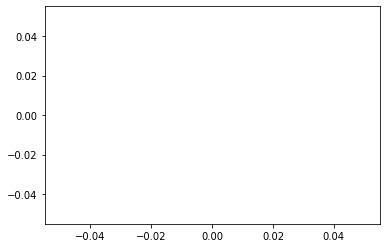

In [232]:
plt.plot(hist)

In [224]:
y_train[0]

[1, 0, 0]

## Второй этап

In [7]:
t = np.arange(0,3.5,0.01)
x = lambda t: sin(sin(t) * t**2 + 5 * t)